In [24]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [25]:
ethusd = pd.read_csv('BitFinex/Bitfinex_ETHUSD_d.csv', skiprows=1)

<AxesSubplot:>

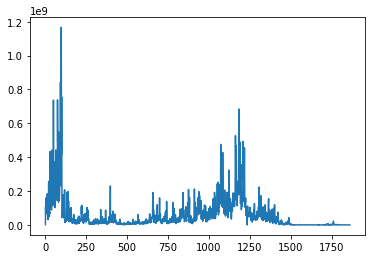

In [26]:
ethusd['Volume USD'].plot()

<AxesSubplot:>

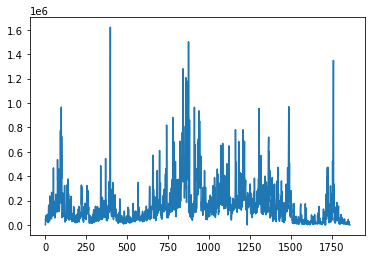

In [11]:
ethusd['Volume ETH'].plot()

<AxesSubplot:>

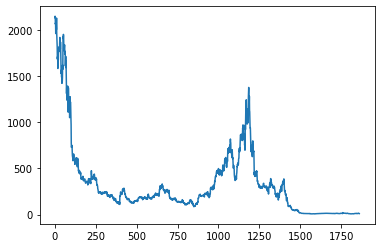

In [6]:
ethusd.open.plot()

In [10]:
ethusd.head()

,unix,date,symbol,open,high,low,close,Volume USD,Volume ETH,datetime
0,1618272000000,2021-04-13 00:00:00,ETH/USD,2138.2,2158.544939,2137.1,2153.7,1.573278e+06,730.500275,1970-01-01 00:26:58.272000
1,1618185600000,2021-04-12 00:00:00,ETH/USD,2152.9,2203.900000,2101.9,2138.2,1.074953e+08,50273.744234,1970-01-01 00:26:58.185600
2,1618099200000,2021-04-11 00:00:00,ETH/USD,2136.7,2166.900000,2115.6,2152.8,7.389330e+07,34324.276259,1970-01-01 00:26:58.099200
3,1618012800000,2021-04-10 00:00:00,ETH/USD,2067.4,2200.000000,2059.1,2136.1,1.592456e+08,74549.703470,1970-01-01 00:26:58.012800
4,1617926400000,2021-04-09 00:00:00,ETH/USD,2081.3,2100.600000,2051.8,2067.4,1.380132e+08,66756.893352,1970-01-01 00:26:57.926400


In [8]:
ethusd.describe()

,unix,open,high,low,close,Volume USD,Volume ETH
count,1.862000e+03,1862.000000,1862.000000,1862.000000,1862.000000,1.862000e+03,1.862000e+03
mean,2.334222e+11,323.379708,336.607715,308.551599,324.529508,5.627969e+07,1.553950e+05
std,5.644766e+11,387.661168,404.061376,369.239435,389.904088,9.298156e+07,1.676727e+05
min,1.457482e+09,6.682000,7.324000,5.861000,6.702000,0.000000e+00,0.000000e+00
25%,1.497679e+09,110.855000,118.635000,106.300000,111.262500,5.721198e+06,4.901459e+04
50%,1.537877e+09,211.035000,217.995000,203.265000,211.075000,2.424689e+07,1.088843e+05
75%,1.578074e+09,382.874044,393.927500,367.967500,383.237500,6.522457e+07,1.947546e+05
max,1.618272e+12,2152.900000,2203.900000,2137.100000,2153.700000,1.167773e+09,1.620940e+06


In [27]:
ethusd['datetime'] = pd.to_datetime(ethusd['unix'])

In [28]:
ethusd['open_14_days'] = ethusd['open'][::-1].rolling(window=14).mean()
ethusd['close_7_days'] = ethusd['close'][::-1].rolling(window=7).max()

<AxesSubplot:>

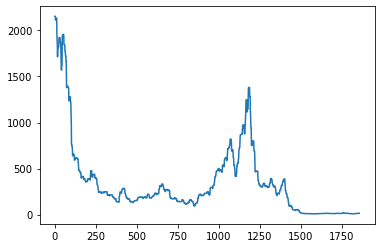

In [29]:
ethusd['close_7_days'].plot()

<AxesSubplot:>

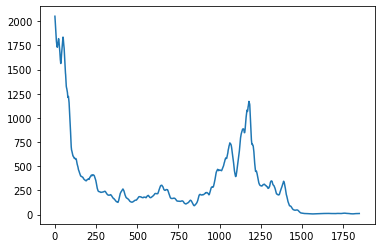

In [22]:
ethusd['open_14_days'].plot()

In [23]:
ethusd.head()

,unix,date,symbol,open,high,low,close,Volume USD,Volume ETH,datetime,open_14_days,close_7_days
0,1618272000000,2021-04-13 00:00:00,ETH/USD,2138.2,2158.544939,2137.1,2153.7,1.573278e+06,730.500275,1970-01-01 00:26:58.272000,2050.771429,2153.7
1,1618185600000,2021-04-12 00:00:00,ETH/USD,2152.9,2203.900000,2101.9,2138.2,1.074953e+08,50273.744234,1970-01-01 00:26:58.185600,2027.914286,2152.8
2,1618099200000,2021-04-11 00:00:00,ETH/USD,2136.7,2166.900000,2115.6,2152.8,7.389330e+07,34324.276259,1970-01-01 00:26:58.099200,1994.650000,2152.8
3,1618012800000,2021-04-10 00:00:00,ETH/USD,2067.4,2200.000000,2059.1,2136.1,1.592456e+08,74549.703470,1970-01-01 00:26:58.012800,1964.442857,2136.1
4,1617926400000,2021-04-09 00:00:00,ETH/USD,2081.3,2100.600000,2051.8,2067.4,1.380132e+08,66756.893352,1970-01-01 00:26:57.926400,1938.092857,2112.1


In [30]:
for day in range(1, 8):
    ethusd[f'close_day_{day}'] = ethusd['close'][::-1].shift(day+1)

In [31]:
ethusd['dt'] = pd.to_datetime(ethusd['date'])

In [32]:
ethusd['weekday'] = ethusd['dt'].dt.weekday
ethusd['month'] = ethusd['dt'].dt.month
ethusd['year'] = ethusd['dt'].dt.year

In [33]:
ethusd['target'] = ethusd['close'].shift(1)

In [34]:
ethusd[['date', 'close', 'target']].head()

,date,close,target
0,2021-04-13 00:00:00,2153.7,NaN
1,2021-04-12 00:00:00,2138.2,2153.7
2,2021-04-11 00:00:00,2152.8,2138.2
3,2021-04-10 00:00:00,2136.1,2152.8
4,2021-04-09 00:00:00,2067.4,2136.1


In [35]:
ethusd = pd.get_dummies(ethusd, columns=['weekday', 'month', 'year'])
ethusd.drop('date', axis=1, inplace=True)
ethusd.drop('unix', axis=1, inplace=True)
ethusd.drop('symbol', axis=1, inplace=True)
ethusd.dropna(inplace=True)

In [37]:
ethusd

,open,high,low,close,Volume USD,Volume ETH,datetime,open_14_days,close_7_days,close_day_1,...,month_9,month_10,month_11,month_12,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021
1,2152.90,2203.90,2101.90,2138.20,1.074953e+08,50273.744234,1970-01-01 00:26:58.185600000,2027.914286,2152.80,2136.10,...,0,0,0,0,0,0,0,0,0,1
2,2136.70,2166.90,2115.60,2152.80,7.389330e+07,34324.276259,1970-01-01 00:26:58.099200000,1994.650000,2152.80,2067.40,...,0,0,0,0,0,0,0,0,0,1
3,2067.40,2200.00,2059.10,2136.10,1.592456e+08,74549.703470,1970-01-01 00:26:58.012800000,1964.442857,2136.10,2081.40,...,0,0,0,0,0,0,0,0,0,1
4,2081.30,2100.60,2051.80,2067.40,1.380132e+08,66756.893352,1970-01-01 00:26:57.926400000,1938.092857,2112.10,1964.90,...,0,0,0,0,0,0,0,0,0,1
5,1964.60,2084.00,1950.00,2081.40,6.626750e+07,31837.943237,1970-01-01 00:26:57.840000000,1902.792857,2133.10,2112.10,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,10.67,11.20,10.58,11.00,5.034526e+04,4606.570000,1970-01-01 00:00:01.458950400,11.883571,12.43,11.20,...,0,0,0,0,1,0,0,0,0,0
1845,11.32,11.35,10.52,10.67,2.706509e+05,24977.640000,1970-01-01 00:00:01.458864000,11.975000,12.43,12.43,...,0,0,0,0,1,0,0,0,0,0
1846,12.43,12.47,10.67,11.20,1.651251e+05,14512.640000,1970-01-01 00:00:01.458777600,12.005714,12.43,11.37,...,0,0,0,0,1,0,0,0,0,0
1847,11.37,12.43,11.20,12.43,9.222684e+04,7721.470000,1970-01-01 00:00:01.458691200,11.917857,12.43,11.95,...,0,0,0,0,1,0,0,0,0,0


In [36]:
y = ethusd.target
X = ethusd.drop('target', axis=1)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
X_test

,open,high,low,close,Volume USD,Volume ETH,datetime,open_14_days,close_7_days,close_day_1,...,month_9,month_10,month_11,month_12,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021
352,194.27,199.68,192.53,197.50,1.709677e+07,87305.720000,1970-01-01 00:00:01.587859200,173.687857,197.500000,187.68,...,0,0,0,0,0,0,0,0,1,0
1289,304.26,304.63,292.10,296.82,4.007631e+07,133989.300000,1970-01-01 00:00:01.506902400,289.065714,309.750000,303.44,...,0,1,0,0,0,1,0,0,0,0
1517,12.92,12.99,12.57,12.92,4.254524e+05,33272.920000,1970-01-01 00:00:01.487203200,11.466429,12.960000,12.96,...,0,0,0,0,0,1,0,0,0,0
1264,295.10,299.50,291.60,295.99,2.026724e+07,68465.000000,1970-01-01 00:00:01.509062400,310.825714,299.230000,295.46,...,0,1,0,0,0,1,0,0,0,0
409,227.82,233.50,218.10,218.16,1.584029e+07,69962.320000,1970-01-01 00:00:01.582934400,256.236429,275.590000,227.41,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,264.29,274.60,257.32,269.51,3.905797e+07,146171.940000,1970-01-01 00:00:01.502064000,216.920714,269.510000,253.87,...,0,0,0,0,0,1,0,0,0,0
1390,320.94,329.90,316.36,324.37,9.799488e+06,30171.700000,1970-01-01 00:00:01.498176000,342.071429,364.560000,321.66,...,0,0,0,0,0,1,0,0,0,0
807,117.27,118.49,112.16,113.43,2.743658e+07,237779.770000,1970-01-01 00:00:01.548547200,121.327857,120.190000,117.27,...,0,0,0,0,0,0,0,1,0,0
768,140.57,143.30,138.32,140.04,2.029985e+07,144269.870000,1970-01-01 00:00:01.551916800,140.648571,140.570000,140.00,...,0,0,0,0,0,0,0,1,0,0


In [39]:
from sklearn.metrics import max_error, mean_absolute_error, r2_score

In [49]:
from sklearn.linear_model import LinearRegression

In [55]:
model = LinearRegression()

In [61]:
model.fit(X_train, y_train)

TypeError: The DTypes <class 'numpy.dtype[datetime64]'> and <class 'numpy.dtype[float64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

In [54]:
y_pred = model.predict(X_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.